In [1]:
import pandas as pd

fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)
fix_df

,qid,question_text,target
0,42b9446db515fcd253a7,What is the qualification for an animator or a...,0
1,bdad704204f8535e313a,Do different flavoured protein shakes have dif...,0
2,d13a0c498bf5a9cb2bc3,How does someone keep their children when they...,0
3,237828efb8348c39f14b,How much time required to learn Bollywood danc...,0
4,3c02e808603faa6ecc20,What skills can I have to fit in formulae one?,0
...,...,...,...
3995,8e636f1fb48158100adc,"In ancient China, there was nothing other than...",1
3996,bffed8f6e8fec61187b5,"I have a 3 inch penis, can I fuck a lot's girls?",1
3997,324670fdf6a9ba5cc019,Are all blacks from Haiti?,1
3998,e74c62301253bbc32563,Why are questions demonizing Israel okay but a...,1


In [2]:
import sys
sys.path.append('../../..')

from preprocessing import preprocessing_text_with_lemma
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=28)
print(X_train.shape)
print(X_test.shape)

(2400,)
(1600,)


In [5]:
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

from TFIDFVectorizer import TFIDF
tfidf_vectorizer = TFIDF(X_train_list)
X_train_tfidf = tfidf_vectorizer.transform_tfidf(X_train_list)
X_test_tfidf = tfidf_vectorizer.transform_tfidf(X_test_list)

In [6]:
from MultinomialWithEvidence import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train, tfidf_vectorizer.idf)
y_pred = mnb.predict(X_test_tfidf)

{0: 0.02, 1: 0.98}
{0: 0.976, 1: 0.024}
{0: 0.993, 1: 0.007}
{0: 0.841, 1: 0.159}
{0: 0.001, 1: 0.999}
{0: 0.716, 1: 0.284}
{0: 0.502, 1: 0.497}
{0: 0.252, 1: 0.748}
{0: 0.651, 1: 0.349}
{0: 0.279, 1: 0.721}
{0: 0.097, 1: 0.903}
{0: 0.097, 1: 0.903}
{0: 0.189, 1: 0.811}
{0: 0.912, 1: 0.088}
{0: 0.946, 1: 0.054}
{0: 0.017, 1: 0.983}
{0: 0.982, 1: 0.018}
{0: 0.988, 1: 0.012}
{0: 0.089, 1: 0.911}
{0: 0.008, 1: 0.992}
{0: 0.659, 1: 0.341}
{0: 0.001, 1: 0.999}
{0: 0.009, 1: 0.991}
{0: 0.011, 1: 0.989}
{0: 0.069, 1: 0.931}
{0: 0.004, 1: 0.996}
{0: 0.007, 1: 0.993}
{0: 0.4, 1: 0.6}
{0: 0.019, 1: 0.981}
{0: 0.003, 1: 0.997}
{0: 0.021, 1: 0.979}
{0: 0.002, 1: 0.998}
{0: 0.986, 1: 0.014}
{0: 0.793, 1: 0.207}
{0: 0.373, 1: 0.627}
{0: 0.227, 1: 0.773}
{0: 0.067, 1: 0.933}
{0: 0.157, 1: 0.843}
{0: 0.392, 1: 0.608}
{0: 0.188, 1: 0.812}
{0: 0.021, 1: 0.979}
{0: 0.016, 1: 0.984}
{0: 0.086, 1: 0.914}
{0: 0.28, 1: 0.72}
{0: 0.346, 1: 0.654}
{0: 0.013, 1: 0.987}
{0: 0.017, 1: 0.983}
{0: 0.012, 1: 0.988}


In [7]:
y_pred_label = ["Sincere" if label == 0 else "Insincere" for label in y_pred]
predicted_data = {"Question": X_test, "Target": y_pred_label}
predicted_df = pd.DataFrame(predicted_data)
predicted_df.to_csv('predicted_data_40.csv', index=True)

In [8]:
y_pred_label = ["Sincere" if label == 0 else "Insincere" for label in y_pred]
predicted_data_tfidf = {"Question": X_test_tfidf, "Target": y_pred_label}
predicted_tfidf_df = pd.DataFrame(predicted_data_tfidf)
predicted_tfidf_df.to_csv('predicted_data_tfidf_40.csv', index=True)

In [24]:
TP_datas = [0] * len(y_pred)
TN_datas = [0] * len(y_pred)
FP_datas = [0] * len(y_pred)
FN_datas = [0] * len(y_pred)

y_test_list = y_test.tolist()
y_test_list_label = ["Sincere" if label == 0 else "Insincere" for label in y_test_list]

for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test_list[i] == 1:
        TP_datas[i] = 1
    elif y_pred[i] == 1 and y_test_list[i] == 0:
        FP_datas[i] = 1
    elif y_pred[i] == 0 and y_test_list[i] == 0:
        TN_datas[i] = 1
    elif y_pred[i] == 0 and y_test_list[i] == 1:
        FN_datas[i] = 1

scenario_result = {
    "Question": X_test,
    "Actual": y_test_list_label,
    "Prediction": y_pred_label,
    "TP": TP_datas,
    "TN": TN_datas,
    "FP": FP_datas,
    "FN": FN_datas
}

scenario_result_df = pd.DataFrame(scenario_result)
scenario_result_df.to_csv("scenario_result_40.csv", index=True)

In [10]:
error_prediction_df = scenario_result_df[scenario_result_df['Actual'] != scenario_result_df['Prediction']]
error_prediction_df.to_csv("error_prediction_40.csv", index=True)

In [11]:
import pickle
with open('x_train_tfidf_60.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)

In [12]:
import pickle
with open('x_test_tfidf_40.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

In [13]:
import pickle
with open('mnb_40.pkl', 'wb') as f:
    pickle.dump(mnb, f)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Confusion Matrix:")
cf = confusion_matrix(y_test, y_pred)
print(cf)

print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['Sincere','Insincere'])
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[573 221]
 [ 82 724]]

Classification Report:
              precision    recall  f1-score   support

     Sincere       0.87      0.72      0.79       794
   Insincere       0.77      0.90      0.83       806

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.81      0.81      1600


Accuracy: 0.81


In [15]:
accuracy = round(accuracy, 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

performance_score = [accuracy, precision, recall, f1]

import pickle
with open('performance_score_40.pkl', 'wb') as f:
    pickle.dump(performance_score, f)
print(performance_score)

[0.81, 0.77, 0.9, 0.83]


In [16]:
import pickle
with open('confusion_matrix_40.pkl', 'wb') as f:
    pickle.dump(cf, f)

In [17]:
import pickle

with open('confusion_matrix_40.pkl', 'rb') as f:
    cf_matrix = pickle.load(f)

In [18]:
print(cf_matrix)

[[573 221]
 [ 82 724]]


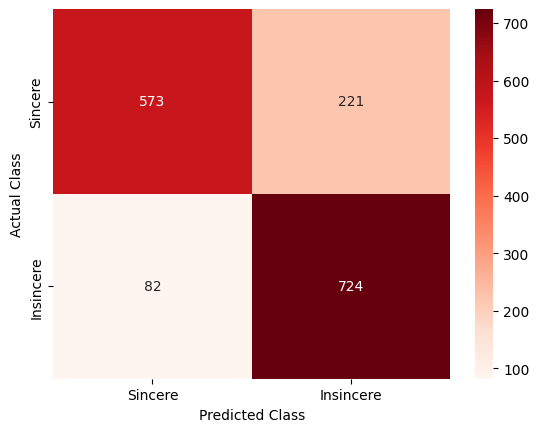

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix,cmap= "Reds",
            annot = True, 
            fmt='', 
            xticklabels = ['Sincere','Insincere'], 
            yticklabels = ['Sincere','Insincere'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")  

plt.show()

In [20]:
import numpy as np

sincere_train = np.sum(y_train == 0)
insincere_train = np.sum(y_train == 1)

sincere_test = np.sum(y_test == 0)
insincere_test = np.sum(y_test == 1)

print("Jumlah data Sincere dalam data pelatihan:", sincere_train)
print("Jumlah data Insincere dalam data pelatihan:", insincere_train)

print("Jumlah data Sincere dalam data pengujian:", sincere_test)
print("Jumlah data Insincere dalam data pengujian:", insincere_test)

Jumlah data Sincere dalam data pelatihan: 1206
Jumlah data Insincere dalam data pelatihan: 1194
Jumlah data Sincere dalam data pengujian: 794
Jumlah data Insincere dalam data pengujian: 806


Sincere:  794
Insincere:  806


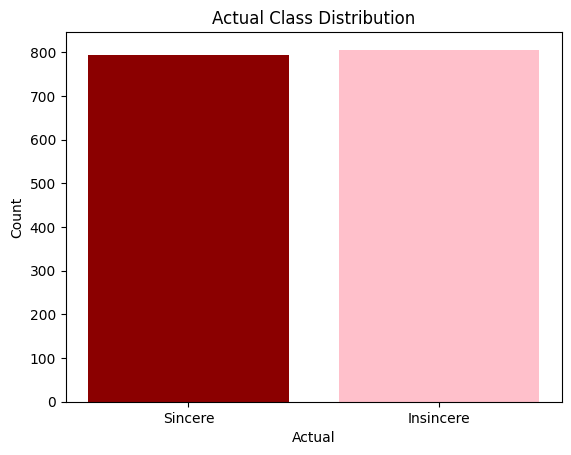

In [21]:
import matplotlib.pyplot as plt

# Data
categories = ['Sincere', 'Insincere']
values = [sincere_test, insincere_test]
colors = ['darkred', 'pink']  # Define colors for each category


print("Sincere: ", sincere_test)
print("Insincere: ", insincere_test)

# Create bar plot with different colors for each category
plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Actual Class Distribution')
plt.xlabel('Actual')
plt.ylabel('Count')

# Show plot
plt.show()


Sincere:  655
Insincere:  945


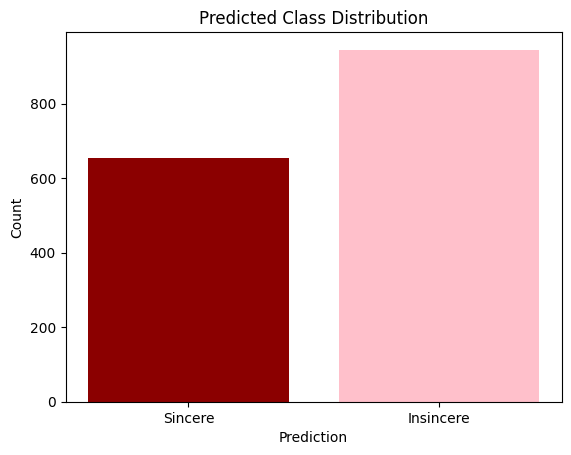

In [22]:
import matplotlib.pyplot as plt


total_sincere_prediction = cf[0, 0] + cf[1, 0] 
total_insincere_prediction = cf[1, 1] + cf[0, 1] 

print("Sincere: ", total_sincere_prediction)
print("Insincere: ", total_insincere_prediction)

# Data
categories = ['Sincere', 'Insincere']
values = [total_sincere_prediction, total_insincere_prediction]
colors = ['darkred', 'pink']  # Define colors for each category

# Create bar plot with different colors for each category
plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Predicted Class Distribution')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Show plot
plt.show()